<a href="https://colab.research.google.com/github/GabrielLoiseau/tau-eval/blob/main/examples/Tau_Eval_PII_Use_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tau-eval datasets==3.6.0 huggingface_hub fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


# Use Case: NER-based PII Redaction with Tau-Eval

**Introduction**
Personally Identifiable Information (PII) includes any data that could potentially identify a specific individual. Redacting PII is crucial for privacy protection in various applications, such as sharing datasets or publishing documents.

Named Entity Recognition (NER) is a common Natural Language Processing (NLP) technique used to identify and categorize named entities in text, such as names of persons, organizations, locations, dates, etc. Many types of PII can be identified using NER.

This notebook demonstrates how to use Tau-Eval's built-in models, which leverage libraries like Microsoft Presidio (though the direct Presidio dependency might be abstracted by Tau-Eval's model wrappers), for PII redaction. We will also explore how to use Tau-Eval's utility metrics and visualization tools to assess the impact of redaction on the text.

## Section 1: Setting up Environment and Models

In [2]:
import os
# Only used if you evaluate api-based models
os.environ["OPENROUTER_API_KEY"] = "your-api-key"

In [ ]:
from tau_eval.models.presidio import UniquePlaceholderPerEntity, EntityDeletion, UniformPlaceholder, CategoryPlaceholder, FakerPlaceholder
#from tau_eval.models.llm_api import LLMPII

p1 = EntityDeletion()
p2 = UniformPlaceholder()
p3 = CategoryPlaceholder()
p4 = UniquePlaceholderPerEntity()
p5 = FakerPlaceholder()
# Uncomment if you are using an Openrouter API key
#p6 = LLMPII("google/gemini-flash-1.5-8b")
#p7 = LLMPII("google/gemini-flash-1.5")

MODEL_LIST = [p1,p2,p3,p4,p5]

## Section 2: Preparing Tasks and Metrics

In [4]:
from tau_eval.tasks import DeIdentification
import tasknet as tn

deid = DeIdentification(dataset="ai4privacy/pii-masking-400k")
imdb = tn.AutoTask('imdb', max_rows=10000, max_rows_eval=1000)
dynahate = tn.AutoTask('dynahate', max_rows=10000, max_rows_eval=1000)
anli = tn.AutoTask('anli/a1')

METRICS = ["rouge","meteor","bertscore"]
TASKS = [deid, imdb, dynahate, anli]

README.md: 0.00B [00:00, ?B/s]

1en.jsonl:   0%|          | 0.00/84.8M [00:00<?, ?B/s]

de.jsonl:   0%|          | 0.00/82.7M [00:00<?, ?B/s]

es.jsonl:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

fr.jsonl:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

it.jsonl:   0%|          | 0.00/79.2M [00:00<?, ?B/s]

nl.jsonl:   0%|          | 0.00/38.4M [00:00<?, ?B/s]

1en.jsonl:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

de.jsonl:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

es.jsonl:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

fr.jsonl:   0%|          | 0.00/21.1M [00:00<?, ?B/s]

it.jsonl:   0%|          | 0.00/19.8M [00:00<?, ?B/s]

nl.jsonl: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/325517 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/81379 [00:00<?, ? examples/s]

README.md: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

mmlu.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

dynahate.py: 0.00B [00:00, ?B/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/41144 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/41144 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/41144 [00:00<?, ? examples/s]

README.md: 0.00B [00:00, ?B/s]

plain_text/train_r1-00000-of-00001.parqu(…):   0%|          | 0.00/3.14M [00:00<?, ?B/s]

plain_text/dev_r1-00000-of-00001.parquet:   0%|          | 0.00/351k [00:00<?, ?B/s]

plain_text/test_r1-00000-of-00001.parque(…):   0%|          | 0.00/353k [00:00<?, ?B/s]

plain_text/train_r2-00000-of-00001.parqu(…):   0%|          | 0.00/6.53M [00:00<?, ?B/s]

plain_text/dev_r2-00000-of-00001.parquet:   0%|          | 0.00/351k [00:00<?, ?B/s]

plain_text/test_r2-00000-of-00001.parque(…):   0%|          | 0.00/362k [00:00<?, ?B/s]

plain_text/train_r3-00000-of-00001.parqu(…):   0%|          | 0.00/14.3M [00:00<?, ?B/s]

plain_text/dev_r3-00000-of-00001.parquet:   0%|          | 0.00/434k [00:00<?, ?B/s]

plain_text/test_r3-00000-of-00001.parque(…):   0%|          | 0.00/435k [00:00<?, ?B/s]

Generating train_r1 split:   0%|          | 0/16946 [00:00<?, ? examples/s]

Generating dev_r1 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test_r1 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train_r2 split:   0%|          | 0/45460 [00:00<?, ? examples/s]

Generating dev_r2 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test_r2 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train_r3 split:   0%|          | 0/100459 [00:00<?, ? examples/s]

Generating dev_r3 split:   0%|          | 0/1200 [00:00<?, ? examples/s]

Generating test_r3 split:   0%|          | 0/1200 [00:00<?, ? examples/s]

## Section 3: Running the PII Redaction Experiment
Tau-Eval will automatically fine tune the ModernBERT model on all tasks, and evaluate the task sensitivity of anonymization.

In [5]:
from tau_eval import Experiment, ExperimentConfig
import wandb
wandb.init(mode="disabled")

config = ExperimentConfig("pii-redaction","answerdotai/ModernBERT-base",True,False)

e = Experiment(MODEL_LIST,METRICS,TASKS,config)

e.run(output_dir="results-pii.json")

Saving the dataset (0/1 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

[07/04/25 16:33:34] DEBUG    Saved generated dataset                                                   ]8;id=288389;file:///usr/local/lib/python3.11/dist-packages/tau_eval/utils.py\utils.py]8;;\:]8;id=256787;file:///usr/local/lib/python3.11/dist-packages/tau_eval/utils.py#219\219]8;;\

DEBUG:tau_eval.logger:Saved generated dataset


                    INFO     Results saved                                                         ]8;id=776646;file:///usr/local/lib/python3.11/dist-packages/tau_eval/experiment.py\experiment.py]8;;\:]8;id=935518;file:///usr/local/lib/python3.11/dist-packages/tau_eval/experiment.py#93\93]8;;\

INFO:tau_eval.logger:Results saved


You can inspect each individual task performance using `Experiment.summary()`

In [6]:
e.summary().keys()

dict_keys(['ai4privacy/pii-masking-400k_0', 'imdb/plain_text_1', 'aps___dynahate/0.2.3_2', 'anli/plain_text_3'])

In [7]:
e.summary()['anli/plain_text_3']

,Model Name,Accuracy,F1,bertscore_precision,bertscore_recall,bertscore_f1,meteor,rouge1,rouge2,rougeL
0,Original,0.456,0.453400,-,-,-,-,-,-,-
1,EntityDeletion,0.393,0.373697,0.9409,0.8838,0.9111,0.809,0.863,0.7465,0.863
2,UniformPlaceholder,0.403,0.382933,0.8373,0.8829,0.8592,0.7836,0.8036,0.6953,0.8036
3,CategoryPlaceholder,0.402,0.390823,0.8286,0.8858,0.8559,0.7836,0.7877,0.6818,0.7877
4,UniquePlaceholderPerEntity,0.415,0.413750,0.7832,0.8813,0.8289,0.7836,0.7406,0.6406,0.7398
5,FakerPlaceholder,0.483,0.470366,0.894,0.9103,0.9019,0.7976,0.7585,0.6553,0.7572


Then you can explore visualization tools inside `tau_eval.visualization` and compare the different impact anonymization can have on tasks.

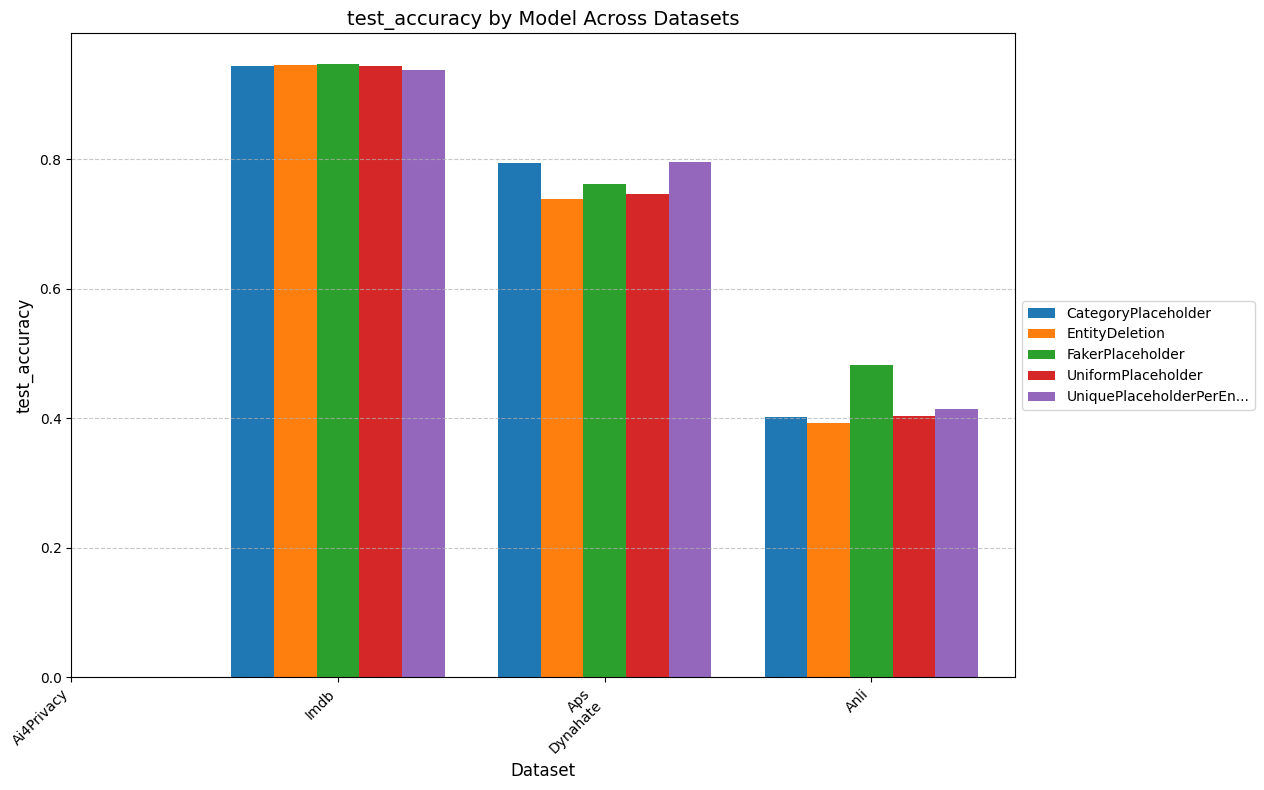

In [9]:
from tau_eval.visualization import plot_metric_comparison_across_datasets
import json

plot_metric_comparison_across_datasets(e.results, "test_accuracy")